# Simulación de embarque aéreo: Análisis y Optimización mediante estrategias de colas  

Grupo 2

Lucía Casas, Carmen Gallardo, Julia Hernández, Hugo Santos



## Funciones empleadas

In [ ]:
class Pasajero:
    def __init__(self, entrada, asiento, velocidad, equipaje):
        self.entrada = entrada
        self.asiento = asiento
        self.velocidad = velocidad
        # Convertir el valor de equipaje en una cadena de caracteres
        if equipaje == 0:
            self.equipaje = 'No lleva'
        elif equipaje == 1:
            self.equipaje = 'Lleva mochila'
        elif equipaje == 2:
            self.equipaje = 'Lleva maleta de mano'
        else:
            self.equipaje = 'Valor de equipaje no válido'

    def mostrar_info(self):
        print(f"Orden de entrada: {self.entrada}")
        print(f"Asiento: {self.asiento}")
        print(f"Velocidad: {round(self.velocidad, 3)}")
        print(f"¿Equipaje?: {self.equipaje}")


In [ ]:
def obtenerAsiento(asientosAsignados):
    # Encontrar todos los asientos no asignados
    filas, columnas = np.where(asientosAsignados == 0)

    # Elegir aleatoriamente un asiento no asignado
    if len(filas) > 0:  # Asegurar que hay asientos disponibles
        indice = np.random.randint(len(filas))
        fila = filas[indice]
        columna = columnas[indice]

        return (fila, columna)
    else:
        # Manejar el caso en que no hay asientos disponibles
        return None


In [ ]:
def imprimir_avion(avion):
    # Definir colores y estilos
    color_verde = '\033[92m'  # Color verde para asientos disponibles
    color_rojo = '\033[91m'   # Color rojo para asientos ocupados
    color_blanco = '\033[0m'  # Color blanco para pasillos y otros

    # Definir símbolos para representar asientos y pasillo
    simbolo_asiento = '●'     # Símbolo para representar asientos
    simbolo_pasillo = ' '      # Símbolo para representar pasillos

    # Imprimir bordes superiores
    print(f'{color_blanco}┌{"─" * (len(avion[0]) + 2)}┐')

    for fila in avion:
        # Imprimir borde lateral izquierdo
        print(f'{color_blanco}│ ', end='')

        for asiento in fila:
            if asiento == '0':
                # Asiento disponible (verde)
                print(f'{color_verde}{simbolo_asiento}{color_blanco}', end='')
            elif asiento == 'P':
                # Asiento ocupado (rojo)
                print(f'{color_rojo}{simbolo_asiento}{color_blanco}', end='')
            else:
                # Pasillo (blanco)
                print(f'{color_blanco}{simbolo_pasillo}', end='')

        # Imprimir borde lateral derecho
        print(f' {color_blanco}│')

    # Imprimir borde inferior
    print(f'{color_blanco}└{"─" * (len(avion[0]) + 2)}┘{color_blanco}')

In [ ]:
def llenar_avion():
    # Aquí va todo el código para llenar el avión

      # BLOQUE 2 : CREAR  E IMPIRMIR AVIÓN
      # Extraer los tiempos de llegada y ordenar los pasajeros por este atributo
      entradas = [pasajero.entrada for pasajero in pasajeros]
      indices_ordenados = sorted(range(len(entradas)), key=lambda i: entradas[i])

      # Reordenar la lista de pasajeros según los tiempos de llegada
      pasajeros_ordenados = [pasajeros[i] for i in indices_ordenados]

      # Inicializar la matriz del avión con '0' (para representar los asientos) y con '|' para el pasillo
      avion = [['0' for _ in range(numColumnas * asientosPorColumna + 1)] for _ in range(numFilas + 1)]
      for i in range(numFilas + 1):
          avion[i][asientosPorColumna] = '|'

      # La primera fila se llena con espacios para simular la ausencia de asientos
      avion[0] = [' ' for _ in range(numColumnas * asientosPorColumna + 1)]



      # BLOQUE 3: LLENAR EL AVIÓN
      # Inicialización del reloj y variables
      tiempoActual = 0
      totalPasajeros = 0
      tiempoLlegadaSiguientePasajero = 0

      # Fondo de cada casilla (0.81 metros) y ancho del asiento (0.45 metros)
      casilla = 0.81
      anchoAsiento = 0.45

      # Contador para los pasajeros
      cont = 1

      # Asumiendo que la lista pasajeros_ordenados ya contiene instancias de Pasajero ordenadas por su tiempo de llegada
      pasajeros_ordenados = sorted(pasajeros, key=lambda x: x.entrada)

      # Inicializar la posición de los pasajeros con una lista de tuplas (fila, columna)
      posicionPasajero = [np.array([None, None]) for _ in range(numPasajeros)]
      tiempoPasajero = [np.array(0) for _ in range(numPasajeros)]
      wait = [np.array(False) for _ in range(numPasajeros)]

      # Inicializar la lista de eventos
      eventos = []

      # Agregar el primer evento de llegada
      if pasajeros_ordenados:
          primer_pasajero = pasajeros_ordenados[0]
          tiempoMov = casilla / primer_pasajero.velocidad
          eventos.append({'tipo': 'entrada', 'tiempo': tiempoMov, 'pasajero': 0})

      # Iniciar la simulación
      while totalPasajeros < numPasajeros:
          # Obtener el siguiente evento
          tiempoEvento, indiceEvento = min((evento['tiempo'], idx) for idx, evento in enumerate(eventos))
          eventoActual = eventos[indiceEvento]

          # Avanzar el tiempo simulado
          tiempoActual = tiempoEvento

          eliminarEvento = True

          if eventoActual['tipo'] == 'entrada':
            # Llegada de un nuevo pasajero
              pasajero_idx = eventoActual['pasajero']
              pasajeroActual = pasajeros_ordenados[pasajero_idx]

              tiempoMov = casilla / pasajeroActual.velocidad
              # Se marca el momento en el tiempo en el que el pasajero entra en la simulación
              tiempoPasajero[pasajero_idx] = tiempoActual
              # Sólo puede entrar un pasajero si hay sitio
              ocupado = False # Inicializamos la variable para indicar si la casilla está ocupada

              for j in range(pasajero_idx - 1, -1, -1):
                  if posicionPasajero[j] and posicionPasajero[j][0] == 0 and posicionPasajero[j][1] == asientosPorColumna:
                      ocupado = True # La casilla está ocupada por un pasajero anterior
                      break

              if not ocupado:
                  # Definir la posición inicial del pasajero al frente del pasillo
                  posicionPasajero[pasajero_idx] = [0, asientosPorColumna]

                  # Agregar evento de movimiento para el pasajero actual
                  # Movimiento de un pasajero hacia su asiento
                  # Cada fila, teniendo en cuenta asiento y espacio para las piernas mide
                  # alrededor de 1.25 metros, luego si el pasajero tiene una velocidad de
                  # x m/s cada cambio de fila implicará 1.25 / x metros
                  eventos.append({'tipo': 'movimiento', 'tiempo': tiempoActual + tiempoMov, 'pasajero': pasajero_idx})

                  # Generar evento de llegada del siguiente pasajero si quedan
                  if pasajero_idx + 1 < len(pasajeros_ordenados):
                      siguiente_pasajero = pasajeros_ordenados[pasajero_idx + 1]
                      tiempoMov = casilla / siguiente_pasajero.velocidad
                      eventos.append({'tipo': 'entrada', 'tiempo': tiempoMov, 'pasajero': pasajero_idx + 1})
              else:
                  # no se añade ni elimina ningún evento y añadimos el tiempo de
                  # espera/ si voy a entrar y no me dejan entrar entonces estoy
                  # esperando fuera luego a partir del desplazamiento del de
                  # delante, tardaré x de acuerdo a mi velocidad en entrar al
                  # avión
                  eventos[indiceEvento]['tiempo'] += tiempoMov
                  eliminarEvento = False

          elif eventoActual['tipo'] == 'movimiento':
              # Movimiento de un pasajero hacia su asiento
              pasajero_idx = eventoActual['pasajero']
              pasajeroActual = pasajeros_ordenados[pasajero_idx]
              mover = True

              # Calcular la fila y columna del asiento asignado al pasajero
              asientoAsignado = pasajeroActual.asiento
              filaAsignada = asientoAsignado[0] + 1 # porque la primera es la entrada al avión
              if asientoAsignado[1] > asientosPorColumna - 1:
                columnaAsignada = asientoAsignado[1] + 1 # si se encuentra al otro lado del pasillo
              else:
                columnaAsignada = asientoAsignado[1]

              # Mover el pasajero hacia su asiento
              if posicionPasajero[pasajero_idx][0] < filaAsignada:
                # Mover hacia adelante si aún no hemos llegado a la fila del asiento
                tiempoMov = casilla / pasajeroActual.velocidad
                # Antes comprobamos si se puede avanzar; si
                # la casilla delantera está ocupada, no se puede mover

                # Sabemos que los pasajeros delanteros han entrado antes, su
                # índice será menor que el del presente
                # Buscamos el primero con el que se vaya a encontrar
                j = pasajero_idx - 1
                while j >= 0:
                  # La distancia con el pasajero de delante se calcula en función de sus
                  # posiciones respecto a la fila en la que se encuentran
                  distancia = abs(posicionPasajero[j][1] - posicionPasajero[pasajero_idx][1])
                  # si están en casillas contiguas y el delantero está en el pasillo,
                  # no se puede mover porque ya está ocupada
                  if posicionPasajero[j][1] == asientosPorColumna and distancia <= 1:
                    # no se actualiza la posición del pasajero
                    mover = False

                  if not mover:
                    j = -1
                  else:
                    j = j - 1

                # Aquí lo que estamos suponiendo es que los pasajeros no modifican su
                # velocidad en ningún momento, simplemente esperan a que la casilla
                # delantera esté vacía para despalzarse a su velocidad propia

                # si no se ha encontrado ningún obstáculo, actualizamos
                # posición
                if mover:
                  posicionPasajero[pasajero_idx][0] += 1
                  # si acaba de llegar a su fila, comprobamos si tiene que
                  # guardar maleta
                  if posicionPasajero[pasajero_idx][0] == filaAsignada and pasajeroActual.equipaje == 'Lleva maleta de mano':
                    # No se moverá hasta que haya guardado la maleta
                    # Suponemos distribución de weibull para guardar la maleta
                    tiempoMaleta = np.random.weibull(1.7) * 16
                    tiempoMov += tiempoMaleta

              elif posicionPasajero[pasajero_idx][1] != columnaAsignada:
                # Estamos en la fila del asiento, avanzar hacia la columna del asiento
                # Antes tenemos que comprobar que no hay nadie en el medio / el que más tarda es el de más adentro
                # de momento le voy a añadir cuatro segundos
                # La velocidad se ve reducida a la mitad
                tiempoMov = anchoAsiento / (pasajeroActual.velocidad * 0.5)
                if posicionPasajero[pasajero_idx][1] < columnaAsignada:
                  # si no ha esperado antes
                  if posicionPasajero[pasajero_idx][1] == 3 and not wait[pasajero_idx]:
                    posibles = list(range(4, columnaAsignada))
                    if any(avion[filaAsignada][pos] == 'P' for pos in posibles):
                      for k in reversed(posibles):
                        if avion[filaAsignada][k] == 'P':
                          tiempoMov += 4
                          wait[pasajero_idx] = True
                          if k == 5:
                            tiempoMov += 4
                          break
                    else:
                      posicionPasajero[pasajero_idx][1] += 1
                  elif wait[pasajero_idx]:
                    wait[pasajero_idx] = False
                    posicionPasajero[pasajero_idx][1] += 2
                  else:
                    posicionPasajero[pasajero_idx][1] += 1
                else:
                  if posicionPasajero[pasajero_idx][1] == 3 and not wait[pasajero_idx]:
                    posibles = list(range(columnaAsignada+1, 3))
                    if any(avion[filaAsignada][pos] == 'P' for pos in posibles):
                      for k in posibles:
                        if avion[filaAsignada][k] == 'P':
                          tiempoMov += 4
                          wait[pasajero_idx] = True
                          if k == 1:
                            tiempoMov += 4
                          break
                    else:
                      posicionPasajero[pasajero_idx][1] -= 1
                  elif wait[pasajero_idx]:
                    wait[pasajero_idx] = False
                    posicionPasajero[pasajero_idx][1] -= 2
                  else:
                    posicionPasajero[pasajero_idx][1] -= 1

              # Agregar evento de movimiento para el pasajero actual si aún no ha llegado a su asiento
              if posicionPasajero[pasajero_idx] != [filaAsignada, columnaAsignada]:
                eventos.append({'tipo': 'movimiento', 'tiempo': tiempoActual + tiempoMov, 'pasajero': pasajero_idx})
              else:
                # El pasajero ha llegado a su asiento asignado
                avion[posicionPasajero[pasajero_idx][0]][posicionPasajero[pasajero_idx][1]] = 'P'
                totalPasajeros += 1
                # Calculamos el tiempo en el que el pasajero ha estado activo en la simulación
                # Se le ha añadido el tiempoMov porque todavía no se había añadido al reloj
                # (se añade al comienzo del siguiente bucle en la elección del evento)
                tiempoPasajero[pasajero_idx] = tiempoActual + tiempoMov - tiempoPasajero[pasajero_idx]

                if totalPasajeros == numPasajeros:
                  tiempoActual += tiempoMov


          # Eliminar el evento actual de la lista de eventos si es necesario
          if eliminarEvento:
            del eventos[indiceEvento]

      tiempo_embarque = [math.trunc(tiempoActual/60), math.trunc(tiempoActual - 60 * math.trunc(tiempoActual/60))]
      return tiempo_embarque

***Importación de librerías***


In [ ]:
import numpy as np
import math
import time

import matplotlib.pyplot as plt
from IPython.display import clear_output

np.random.seed(123)  # semilla para las distribuciones aleatorias

In [ ]:
# Inicialización del vector con las medias de las diferentes estrategias
tiempos = []

Se definen las características del avión sobre el que se realizará el estudio.


In [ ]:
# Definir las dimensiones del avión
numFilas = 28  # Número de filas en el avión
numColumnas = 2  # Número de columnas en el avión
asientosPorColumna = 3  # Número de asientos por columna
totalAsientos = numFilas * numColumnas * asientosPorColumna  # Cálculo del total de asientos

In [ ]:
# Fondo de cada casilla (0.81 metros) y ancho del asiento (0.45 metros)
casilla = 0.81
anchoAsiento = 0.45

De acuerdo a la capacidad del avión, se calculan los pasajeros que vayan a embarcar en función de si se ha ocupado por completo la capacidad del avión.

In [ ]:
# Número de pasajeros a generar
rate = 1  # Tasa de ocupación
numPasajeros = round(totalAsientos * rate)  # Cálculo del número de pasajeros

**EJEMPLO INICIALIZACIÓN PASAJEROS**

A continuación, se generarán los pasajeros con sus respectivas características asociadas que determinarán su comportamiento en el interior de la nave.

In [ ]:
# Inicializar la matriz para rastrear los asientos asignados
asientosAsignados = np.zeros((numFilas, numColumnas * asientosPorColumna))

# Lista para almacenar los objetos Pasajero
pasajeros = []
# Generar un orden aleatorio de las posiciones
posiciones_random = np.random.choice(np.arange(1, numPasajeros + 1), numPasajeros, replace=False)

# Iterar sobre los pasajeros
for i, num in enumerate(posiciones_random, start=1):
    # Generar tiempo de llegada
    entrada = num
    # Obtener un asiento no asignado
    asiento = obtenerAsiento(asientosAsignados)
    if asiento is not None:
        fila, columna = asiento

        velocidad = np.random.normal(1.1, 0.2)
        equipaje = np.random.randint(0, 3)

        # Marcar el asiento como asignado
        asientosAsignados[fila, columna] = 1

        # Crear el objeto Pasajero y almacenarlo en la lista
        pasajeros.append(Pasajero(entrada, asiento, velocidad, equipaje))

# Mostrar la información de los primeros pasajeros generados
for i in range(min(10, len(pasajeros))):
    print(f"Pasajero {i + 1}")
    pasajeros[i].mostrar_info()
    print('---------------------------')


Pasajero 1
Orden de entrada: 64
Asiento: (16, 1)
Velocidad: 1.095
¿Equipaje?: Lleva maleta de mano
---------------------------
Pasajero 2
Orden de entrada: 87
Asiento: (12, 1)
Velocidad: 1.107
¿Equipaje?: Lleva mochila
---------------------------
Pasajero 3
Orden de entrada: 146
Asiento: (10, 2)
Velocidad: 1.185
¿Equipaje?: No lleva
---------------------------
Pasajero 4
Orden de entrada: 54
Asiento: (23, 3)
Velocidad: 0.779
¿Equipaje?: Lleva mochila
---------------------------
Pasajero 5
Orden de entrada: 61
Asiento: (20, 5)
Velocidad: 1.167
¿Equipaje?: Lleva mochila
---------------------------
Pasajero 6
Orden de entrada: 42
Asiento: (18, 5)
Velocidad: 0.874
¿Equipaje?: Lleva maleta de mano
---------------------------
Pasajero 7
Orden de entrada: 86
Asiento: (14, 3)
Velocidad: 1.053
¿Equipaje?: No lleva
---------------------------
Pasajero 8
Orden de entrada: 149
Asiento: (23, 0)
Velocidad: 0.818
¿Equipaje?: Lleva mochila
---------------------------
Pasajero 9
Orden de entrada: 138
A

**Trazado del seating plan**

Además, se trazará una matriz que representa el layout o distribución de la cabina del avión. Los asientos vacíos se representarán con ceros, mientras que los ocupados se irán rellenando con la letra **P**.

El pasillo se encuentra en el centro y sirve de vía para el desplazamiento de los pasajeros a su fila de destino.

In [ ]:
# Inicializar la matriz del avión con '0' (para representar los asientos) y con '|' para el pasillo
avion = [['0' for _ in range(numColumnas * asientosPorColumna + 1)] for _ in range(numFilas + 1)]
for i in range(numFilas + 1):
    avion[i][asientosPorColumna] = '|'

# La primera fila se llena con espacios para simular la ausencia de asientos
avion[0] = [' ' for _ in range(numColumnas * asientosPorColumna + 1)]


imprimir_avion(avion)


┌─────────┐
│         │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
│ ●●● ●●● │
└─────────┘


**Modelo**

Supongo que la estrategia de embarque en este caso es la random, porque se han asignado asientos aleatorios a cada pasajero y no se sigue ningún orden
Habría que definir como parámetro el fondo de cada casilla del layout del avión. Las casillas representan el asiento + espacio para las piernas. Además, habría que definir una distancia diferente para los movimientos laterales una vez el pasajero ys se está desplazando dentro de la propia fila. Además, habría que controlar el tiempo de acceso al asiento en función de si la fila ya está ocupada.

Por otro lado, hay que tener en cuenta los tiempos añadidos de espera cuando existen pasajeros más lentos delante de otros más rápidos y están "obstaculizando" el paso, retrasando la llegada al asiento asignado.

## Métodos de embarque

### **Método Aleatorio**

In [ ]:
tiempos_embarque = []

for semilla in range(500):

    np.random.seed(semilla)  # semilla para las distribuciones aleatorias

    # Inicializar la matriz para rastrear los asientos asignados
    asientosAsignados = np.zeros((numFilas, numColumnas * asientosPorColumna))

    # Lista para almacenar los objetos Pasajero
    pasajeros = []

    # Generar un orden aleatorio de las posiciones
    posiciones_random = np.random.choice(np.arange(1, numPasajeros + 1), numPasajeros, replace=False)

    # Iterar sobre los pasajeros
    for i, num in enumerate(posiciones_random, start=1):
        # Generar tiempo de llegada
        entrada = num
        # Obtener un asiento no asignado
        asiento = obtenerAsiento(asientosAsignados)
        if asiento is not None:
            fila, columna = asiento

            velocidad = np.random.normal(1.2, 0.2)
            equipaje = np.random.randint(0, 3)

            # Marcar el asiento como asignado
            asientosAsignados[fila, columna] = 1

            # Crear el objeto Pasajero y almacenarlo en la lista
            pasajeros.append(Pasajero(entrada, asiento, velocidad, equipaje))

    # Simulación del llenado del avión
    tiempo_embarque = llenar_avion()
    tiempos_embarque.append(tiempo_embarque)

# Convertir los tiempos a segundos
tiempos_segundos = [tiempo[0] * 60 + tiempo[1] for tiempo in tiempos_embarque]

# Calcular la media de los tiempos en segundos
media_tiempo_segundos = np.mean(tiempos_segundos)
tiempos.append(media_tiempo_segundos)

# Convertir la media de vuelta a minutos y segundos
media_minutos = int(media_tiempo_segundos / 60)
media_segundos = int(media_tiempo_segundos % 60)

# Imprimir la media de los tiempos
print(f"La media de los tiempos es: {media_minutos} minutos y {media_segundos} segundos")


La media de los tiempos es: 49 minutos y 42 segundos


### **Método Rotating Zone**

In [ ]:
tiempos_embarque = []

for i in range(500):
    # Inicializar la matriz para rastrear los asientos asignados
    asientosAsignados = np.zeros((numFilas, numColumnas * asientosPorColumna))

    # Lista para almacenar los objetos Pasajero
    pasajeros = []
    # Definir el orden de asignación de filas según Rotating Zone
    zonas_rotating_zone = ["Primera", "Última", "Segunda", "Tercera"]

    # Iterar sobre las zonas en el orden Rotating Zone
    for zona in zonas_rotating_zone:
        filas_zona = []
        if zona == "Primera":
            filas_zona = range(0, 7)  # Filas de la primera zona
        elif zona == "Última":
            filas_zona = range(21, 28)  # Filas de la última zona
        elif zona == "Segunda":
            filas_zona = range(7, 14)  # Filas de la segunda zona
        elif zona == "Tercera":
            filas_zona = range(14, 21)  # Filas de la tercera zona

        # Obtener asientos disponibles en la zona
        asientos_disponibles = []
        for fila in filas_zona:
            asientos_disponibles.extend([(fila, col) for col in range(numColumnas * asientosPorColumna) if asientosAsignados[fila, col] == 0])

        # Mezclar los asientos disponibles de forma aleatoria
        np.random.shuffle(asientos_disponibles)

        # Asignar asientos a los pasajeros en la zona
        for i in range(len(asientos_disponibles[:numPasajeros])):
            fila, columna = asientos_disponibles[i]
            asientosAsignados[fila, columna] = 1
            asiento = (fila, columna)
            entrada = len(pasajeros) + 1  # Contador de pasajeros
            velocidad = np.random.normal(1.2, 0.2)
            equipaje = np.random.randint(0, 3)
            pasajeros.append(Pasajero(entrada, asiento, velocidad, equipaje))

    # Simulación del llenado del avión
    tiempo_embarque = llenar_avion()
    tiempos_embarque.append(tiempo_embarque)

# Convertir los tiempos a segundos
tiempos_segundos = [tiempo[0] * 60 + tiempo[1] for tiempo in tiempos_embarque]

# Calcular la media de los tiempos en segundos
media_tiempo_segundos = np.mean(tiempos_segundos)
tiempos.append(media_tiempo_segundos)

# Convertir la media de vuelta a minutos y segundos
media_minutos = int(media_tiempo_segundos / 60)
media_segundos = int(media_tiempo_segundos % 60)

# Imprimir la media de los tiempos
print(f"La media de los tiempos es: {media_minutos} minutos y {media_segundos} segundos")


La media de los tiempos es: 49 minutos y 39 segundos


### **Método Back To Front**

In [ ]:
tiempos_embarque = []

for i in range(500):
    # Inicializar la matriz para rastrear los asientos asignados
    asientosAsignados = np.zeros((numFilas, numColumnas * asientosPorColumna))

    # Lista para almacenar los objetos Pasajero
    pasajeros = []
    # Definir el orden de asignación de filas según Back To Front
    zonas_rotating_zone = ["Última", "Tercera", "Segunda", "Primera"]

    # Iterar sobre las zonas en el orden Back To Front
    for zona in zonas_rotating_zone:
        filas_zona = []
        if zona == "Primera":
            filas_zona = range(0, 7)  # Filas de la primera zona
        elif zona == "Última":
            filas_zona = range(21, 28)  # Filas de la última zona
        elif zona == "Segunda":
            filas_zona = range(7, 14)  # Filas de la segunda zona
        elif zona == "Tercera":
            filas_zona = range(14, 21)  # Filas de la tercera zona

        # Obtener asientos disponibles en la zona
        asientos_disponibles = []
        for fila in filas_zona:
            asientos_disponibles.extend([(fila, col) for col in range(numColumnas * asientosPorColumna) if asientosAsignados[fila, col] == 0])

        # Mezclar los asientos disponibles de forma aleatoria
        np.random.shuffle(asientos_disponibles)

        # Asignar asientos a los pasajeros en la zona
        for i in range(len(asientos_disponibles[:numPasajeros])):
            fila, columna = asientos_disponibles[i]
            asientosAsignados[fila, columna] = 1
            asiento = (fila, columna)
            entrada = len(pasajeros) + 1  # Contador de pasajeros
            velocidad = np.random.normal(1.2, 0.2)
            equipaje = np.random.randint(0, 3)
            pasajeros.append(Pasajero(entrada, asiento, velocidad, equipaje))

    # Simulación del llenado del avión
    tiempo_embarque = llenar_avion()
    tiempos_embarque.append(tiempo_embarque)

# Convertir los tiempos a segundos
tiempos_segundos = [tiempo[0] * 60 + tiempo[1] for tiempo in tiempos_embarque]

# Calcular la media de los tiempos en segundos
media_tiempo_segundos = np.mean(tiempos_segundos)
tiempos.append(media_tiempo_segundos)

# Convertir la media de vuelta a minutos y segundos
media_minutos = int(media_tiempo_segundos / 60)
media_segundos = int(media_tiempo_segundos % 60)

# Imprimir la media de los tiempos
print(f"La media de los tiempos es: {media_minutos} minutos y {media_segundos} segundos")



La media de los tiempos es: 49 minutos y 41 segundos


### **Método Outside In**

In [ ]:
# Ejecutar la simulación 500 veces y almacenar los tiempos
tiempos_embarque = []
for _ in range(500):
    # BLOQUE 1 : ASIGNAR ASIENTOS Y BILLETES

    # Inicializar la matriz para rastrear los asientos asignados
    asientosAsignados = np.zeros((numFilas, numColumnas * asientosPorColumna))

    # Lista para almacenar los objetos Pasajero
    pasajeros = []
    # Definir el orden de asignación de columnas según Rotating Zone
    zonas_rotating_zone = ["Ventana", "Medio", "Pasillo"]

    # Iterar sobre las zonas en el orden Rotating Zone
    for zona in zonas_rotating_zone:
        columnas_zona = []
        if zona == "Ventana":
            columnas_zona = [0,5]  # Filas de la primera zona
        elif zona == "Medio":
            columnas_zona = [1,4]  # Filas de la última zona
        elif zona == "Pasillo":
            columnas_zona = [2,3]  # Filas de la segunda zona

        # Obtener asientos disponibles en la zona
        asientos_disponibles = []
        for fila in range(numFilas):
            for columna in columnas_zona:
                if asientosAsignados[fila, columna] == 0:
                    asientos_disponibles.append((fila, columna))

        # Mezclar los asientos disponibles de forma aleatoria
        np.random.shuffle(asientos_disponibles)

        # Asignar asientos a los pasajeros en la zona
        for i in range(len(asientos_disponibles[:numPasajeros])):
            fila, columna = asientos_disponibles[i]
            asientosAsignados[fila, columna] = 1
            asiento = (fila, columna)
            entrada = len(pasajeros) + 1  # Contador de pasajeros
            velocidad = np.random.normal(1.2, 0.2)
            equipaje = np.random.randint(0, 3)
            pasajeros.append(Pasajero(entrada, asiento, velocidad, equipaje))

    # Simulación del llenado del avión
    tiempo_embarque = llenar_avion()
    tiempos_embarque.append(tiempo_embarque)

# Convertir los tiempos a segundos
tiempos_segundos = [tiempo[0] * 60 + tiempo[1] for tiempo in tiempos_embarque]

# Calcular la media de los tiempos en segundos
media_tiempo_segundos = np.mean(tiempos_segundos)
tiempos.append(media_tiempo_segundos)

# Convertir la media de vuelta a minutos y segundos
media_minutos = int(media_tiempo_segundos / 60)
media_segundos = int(media_tiempo_segundos % 60)

# Imprimir la media de los tiempos
print(f"La media de los tiempos es: {media_minutos} minutos y {media_segundos} segundos")

La media de los tiempos es: 42 minutos y 29 segundos


### **Método Reverse Pyramid**

In [ ]:
tiempos_embarque = []

for semilla in range(500):

    np.random.seed(semilla)  # semilla para las distribuciones aleatorias

    # Inicializar la matriz para rastrear los asientos asignados
    asientosAsignados = np.zeros((numFilas, numColumnas * asientosPorColumna))

    # Lista para almacenar los objetos Pasajero
    pasajeros = []

    # Generar un orden aleatorio de las posiciones
    posiciones_random = np.random.choice(np.arange(1, numPasajeros + 1), numPasajeros, replace=False)

    # Iterar sobre los pasajeros
    for i, num in enumerate(posiciones_random, start=1):
        # Generar tiempo de llegada
        entrada = num
        # Obtener un asiento no asignado
        asiento = obtenerAsiento(asientosAsignados)
        if asiento is not None:
            fila, columna = asiento

            velocidad = np.random.normal(1.2, 0.2)
            equipaje = np.random.randint(0, 3)

            # Marcar el asiento como asignado
            asientosAsignados[fila, columna] = 1

            # Crear el objeto Pasajero y almacenarlo en la lista
            pasajeros.append(Pasajero(entrada, asiento, velocidad, equipaje))

    cont = []
    i = 0
    index = []

    # Los puntos de corte están al 20%, 40% y 70%
    limites = [0.2, 0.4, 0.7]
    limites = [round(numFilas * limite) for limite in limites]

    # Bloque 1
    # Contar la cantidad de pasajeros que cumplen con el criterio
    cont.append(0)
    ind = []
    for indice, pasajero in enumerate(pasajeros):
        fila, columna = pasajero.asiento
        if fila >= limites[1] and (columna == 0 or columna == 5):
            cont[i] += 1
            ind.append(indice)
    index.append(ind)

    # Bloque 2
    i += 1
    cont.append(0)
    ind = []
    for indice, pasajero in enumerate(pasajeros):
        fila, columna = pasajero.asiento
        if (fila in range(limites[0]-1, limites[1]) and (columna == 0 or columna == 5)) or (fila >= limites[2] and (columna == 1 or columna == 4)):
            cont[i] += 1
            ind.append(indice)
    index.append(ind)

    # Bloque 3
    i += 1
    cont.append(0)
    ind = []
    for indice, pasajero in enumerate(pasajeros):
        fila, columna = pasajero.asiento
        if (fila < limites[0]-1 and (columna == 0 or columna == 5)) or (fila in range(limites[0]-1, limites[2]) and (columna == 1 or columna == 4)):
            cont[i] += 1
            ind.append(indice)
    index.append(ind)

    # Bloque 4
    i += 1
    cont.append(0)
    ind = []
    for indice, pasajero in enumerate(pasajeros):
        fila, columna = pasajero.asiento
        if (fila < limites[0]-1 and (columna == 1 or columna == 4)) or (fila >= limites[2]-1 and (columna == 2 or columna == 3)):
            cont[i] += 1
            ind.append(indice)
    index.append(ind)

    # Bloque 5
    i += 1
    cont.append(0)
    ind = []
    for indice, pasajero in enumerate(pasajeros):
        fila, columna = pasajero.asiento
        if fila < limites[2]-1 and (columna == 2 or columna == 3):
            cont[i] += 1
            ind.append(indice)
    index.append(ind)

    inicio = 1
    limite = 0
    for i in range(len(cont)):
      limite += cont[i]
      posiciones_random = np.random.choice(np.arange(inicio, limite+1), cont[i], replace=False)
      j = 0
      for indice in index[i]:
        num = posiciones_random[j]
        pasajeros[indice].entrada = num
        j += 1
      inicio += cont[i]

    # Simulación del llenado del avión
    tiempo_embarque = llenar_avion()
    tiempos_embarque.append(tiempo_embarque)

# Convertir los tiempos a segundos
tiempos_segundos = [tiempo[0] * 60 + tiempo[1] for tiempo in tiempos_embarque]

# Calcular la media de los tiempos en segundos
media_tiempo_segundos = np.mean(tiempos_segundos)
tiempos.append(media_tiempo_segundos)

# Convertir la media de vuelta a minutos y segundos
media_minutos = int(media_tiempo_segundos / 60)
media_segundos = int(media_tiempo_segundos % 60)

# Imprimir la media de los tiempos
print(f"La media de los tiempos es: {media_minutos} minutos y {media_segundos} segundos")


La media de los tiempos es: 42 minutos y 37 segundos


## Comparación gráfica final

In [ ]:
print(tiempos)

[2982.578, 2979.726, 2981.128, 2549.178, 2557.79]


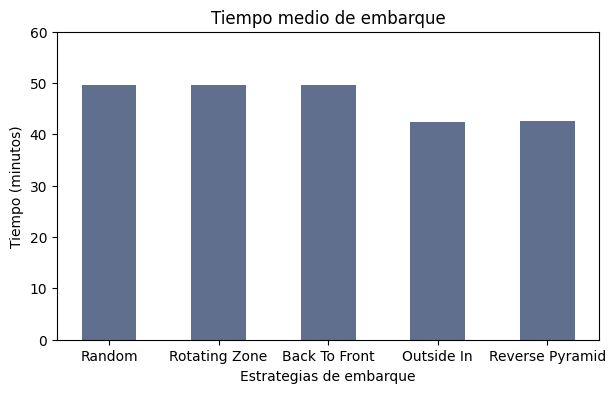

In [ ]:
nombres = ['Random', 'Rotating Zone', 'Back To Front', 'Outside In', 'Reverse Pyramid']
lista_dividida = [x / 60 for x in tiempos]

plt.figure(figsize=(7, 4))
plt.bar(nombres, lista_dividida, alpha=0.9, width=0.5, color='#4D5F81')

# Añadir etiquetas y título
plt.xlabel('Estrategias de embarque')
plt.ylabel('Tiempo (minutos)')
plt.title('Tiempo medio de embarque')
plt.ylim(0, 60)

# Mostrar el histograma
plt.show()